# Boston Housing Dataset: Analysis and Linear Regresion 

We import the sklearn library, which contains many Machine Learning functionalities.
This library also includes very well known datasets, like the Boston Housing Dataset.

In [1]:
import sklearn as skl
from sklearn.datasets import load_boston
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

We load the dataset.
There are 506 instances n and 14 attributes p (check .DESCR).
From them, we want to predict the median value of owner-occupied homes **MEDV**, so this value will be our Y. The rest of attributes of the dataset will form our **X**.

In [2]:
boston_dataset = load_boston()
X = boston_dataset.data
Y = boston_dataset.target
n, p = X.shape
print()

## 1. Exploratory Analysis

We will focus on the relation between the average number of rooms per dwelling **RM** and our **Y=MEDV**.

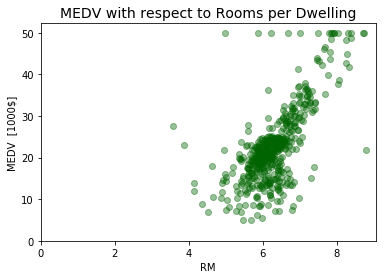

In [3]:
RM=X[:,5]     #For doubts, check boston_dataset.DESCR

length=len(RM)
x=range(0,length)

#Scatter plot between RM and MEDV
plt.scatter(RM,Y,c='darkgreen',alpha=0.4)
plt.title('MEDV with respect to Rooms per Dwelling', fontsize=14)
plt.xlabel('RM')
plt.ylabel('MEDV  [1000$]')
plt.xlim(0)
plt.ylim(0)
plt.show()

We find the correlation matrix between the variables. Of course, diagonal terms = 1 (correlation of value with itself).

In [4]:
corr=np.corrcoef(X[:,5],Y)
print(corr)

[[1.         0.69535995]
 [0.69535995 1.        ]]


We include the Mean Free Plots of the distribution. We will also make the maximum values of each distribution equal, dividing by the ratio of maximum values. In such a way, we can compare them, regardless of their range of values.
If both distributions overlap a lot, it means that they have a high correlation.

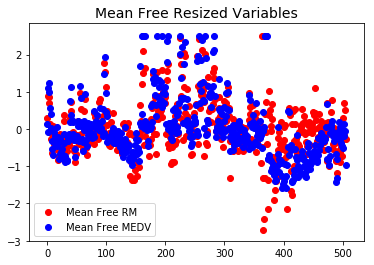

In [5]:
MFRM=X[:,5]-X[:,5].mean()
MFY=Y-Y.mean()

mrm=max(MFRM)
mmedv=max(MFY)
maxratio=mmedv/mrm
MFY=MFY/maxratio

plt.scatter(x,MFRM,c='red',label='Mean Free RM')
plt.scatter(x,MFY,c='blue',label='Mean Free MEDV')
plt.title('Mean Free Resized Variables', fontsize=14)
plt.legend(loc='lower left')
plt.show()

We will calculate the average price of a house for an arbitrary range of number of rooms, let's say, between 5 and 6 rooms.

In [6]:
RMlog=np.logical_and(RM>5,RM<6)
Yrange=Y[RMlog]
Yrangemean=Yrange.mean()
print(Yrangemean*1000,'$')

17551.5923566879 $


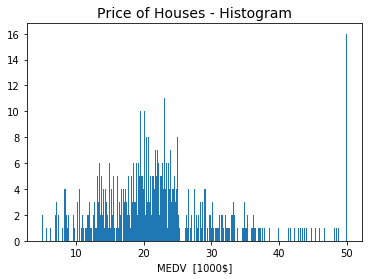

In [7]:
#Histogram
plt.hist(Y,bins=300)
plt.title('Price of Houses - Histogram', fontsize=14)
plt.xlabel('MEDV  [1000$]')
plt.show()
print()

## 2. Simple Linear Regression

Minimum square error:

$ \operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $

where the vectorized form of the regression is:

$W = (X^TX)^{-1}X^TY$

The intercept is -34.670620776439506
The slope is 9.102108981180457


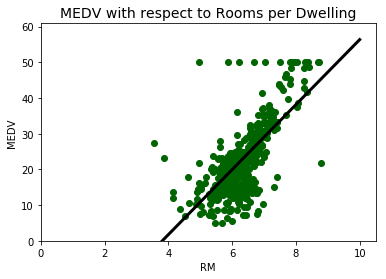

The average price of a house between 5 and 6 rooms is 47248.36005418462 $
The estimated number of rooms for a price of 45.000 $ is 8.752984713890669


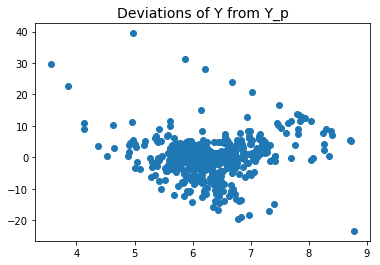

The value of the EMC is: 43.60055177116957 



In [8]:
#We add a column of ones to RM for the independent term:
o=np.ones(len(RM))
RMr=np.column_stack((o,RM))

K=(RMr.T@RMr)
Km=np.linalg.inv(K)

W = Km @ RMr.T @ Y

print('The intercept is',W[0])
print('The slope is',W[1])

xr=np.arange(0,10,0.001)
regression= lambda z: W[0]+W[1]*z
plt.plot(xr,regression(xr),lw=3,c='k')
plt.scatter(RM,Y,c='darkgreen')
plt.title('MEDV with respect to Rooms per Dwelling', fontsize=14)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.xlim(0)
plt.ylim(0)
plt.show()


print('The average price of a house between 5 and 6 rooms is',regression(9)*1000,'$')
regression_inv = lambda z: (z-W[0])/W[1]
print('The estimated number of rooms for a price of 45.000 $ is',regression_inv(45))

Y_p = regression(RM)
diff = Y-Y_p
plt.scatter(RM,diff)
plt.title('Deviations of Y from Y_p', fontsize=14)
plt.show()

EMC=(np.dot(diff,diff))/(len(RM))
print('The value of the EMC is:',EMC,'\n')


## 3. Simple Linear Regression with sklearn

Recall that fit_intercept is used to fix whether we work with non-zero intercept (True; default value) or the regression has zero slope (False).

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

RM=RM.reshape(len(RM),1)
#Alternative: RM=RM[:,np.newaxis]    o     np.reshape(RM,(506,1)) 
F = linear_model.LinearRegression().fit(RM,Y)

print('The slope given by sklearn is:',F.coef_)
print('The origin intercept given by sklearn is:',F.intercept_)
print('The predicted value at RM=9 is:',F.predict(9))
print('The mean squared error is:',mean_squared_error(Y,F.predict(RM)),'\n')

The slope given by sklearn is: [9.10210898]
The origin intercept given by sklearn is: -34.67062077643857
The predicted value at RM=9 is: [47.24836005]
The mean squared error is: 43.60055177116956 



## 4. Multiple Linear Regression

We can generalize the concept of linear regression to more variable. Adding more variables means adding more information, that should help to improve prediction. Still, we will have:

 $W = (X^TX)^{-1}X^TY$
 
We will include the **LSTAT** (% lower status of the population) and **PTRATIO** (pupil-teacher ratio by town) variables.
A comparison between the mean squared error with respect to the Section 2 regression will be done.

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

PTRATIO=X[:,10]
PTRATIO=PTRATIO.reshape(len(PTRATIO),1)
LSTAT=X[:,12]
LSTAT=LSTAT.reshape(len(LSTAT),1)

o=np.ones(len(RM))
Mr=np.column_stack((o,RM,PTRATIO,LSTAT))

K=(Mr.T @ Mr)
Km=np.linalg.inv(K)

W = Km @ Mr.T @ Y

print('The values of intercept and the three slopes given by our regression are:',W,'\n')
#Now we compare with Sklearn values
#We omit the column of ones, since we will work with the SKLearn library

Mr=np.column_stack((RM,PTRATIO,LSTAT))
F1 = linear_model.LinearRegression().fit(Mr,Y)

print('The coefficients (slopes) given by SKLearn are:', F1.coef_)
print('The intercept at the origin is:', F1.intercept_,'\n')

a=[6,18,15.0]
a=np.array(a)
a=a.reshape(1,3)
print('A specific prediction for',a,'will be:',F1.predict(a))
print('Due to the possible correlation between values, we see a great change of the slope between Y and RM now and in the previous exercise (previous slope = 9.1). This makes sense, since the multicollinearity assumption is probably not fulfilled.\n')

print('Now, we will calculate the error of the least squares, which is:', mean_squared_error(Y,F1.predict(Mr)))
print('The error is lower than the previous one. This most likely happens because more variables are taken into account, which predicts more accurately the behaviour of the prices.')

The values of intercept and the three slopes given by our regression are: [18.56711151  4.51542094 -0.93072256 -0.57180569] 

The coefficients (slopes) given by SKLearn are: [ 4.51542094 -0.93072256 -0.57180569]
The intercept at the origin is: 18.567111505395207 

A specific prediction for [[ 6. 18. 15.]] will be: [20.32954586]
Due to the possible correlation between values, we see a great change of the slope between Y and RM now and in the previous exercise (previous slope = 9.1). This makes sense, since the multicollinearity assumption is probably not fulfilled.

Now, we will calculate the error of the least squares, which is: 27.130405758497066
The error is lower than the previous one. This most likely happens because more variables are taken into account, which predicts more accurately the behaviour of the prices.
